Привет, меня зовут Дмитрий Акимов и я буду проверять твой проект.
<br>Небольшая вступительная часть и начнем работу)
<br> Если не против, то предлагаю общаться на «ты». Если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — не указать на совершенные ошибки, а поделиться своим опытом и помочь сделать твой проект лучше. Для этого я буду использовать разный стиль оформления комментариев. 
<div class="alert alert-block alert-success">
<b>Успех:</b> Все хорошо.
</div>

<div class="alert alert-warning">
<b>Рекомендация:</b> Критических замечаний нет, но есть возможность сделать твою работу лучше.
</div>

<div class="alert alert-block alert-danger">
<b>Необходимо исправить:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее». 


## Общая информация по проекту

Я - аналитик фитнес-центра «Культурист-датасаентист». Чтобы бороться с оттоком клиентов, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Моя задача — провести анализ и подготовить план действий по удержанию клиентов.

<div class="alert alert-warning">
<b>Комментарий от ревьюера v1</b>
    
<b>Рекомендация:</b> Хорошо, что у тебя есть краткое описание проекта, было бы полезно разместить тут ещё и описание признаков,  размещение всей информации в начале работы делает поиск необходимой информации легче.
</div>


### Необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import warnings
import itertools

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### Первый взгляд на данные

Прочитаем файл, положим его в переменную gym и посмотрим на данные

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<div class="alert alert-warning">
<b>Комментарий от ревьюера v1</b>
    
<b>Рекомендация:</b> Лучше ограничивать вывод таблицы с помощью операторов .head() или .tail().
</div>


В нашем распоряжении 4000 записей о посетителях фитнес-центра. Пол - 0 или 1. Непонятно, кто кто, но нам это и не важно. Близость к дому\работе, вероятно, обозначается 1, как и все остальные параметры "да\нет".

Посмотрим на формат данных в каждой колонке и проверим наличие пропусков.

### Пропуски

In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
round((gym.isna().mean()*100),2)

gender                               0.0
Near_Location                        0.0
Partner                              0.0
Promo_friends                        0.0
Phone                                0.0
Contract_period                      0.0
Group_visits                         0.0
Age                                  0.0
Avg_additional_charges_total         0.0
Month_to_end_contract                0.0
Lifetime                             0.0
Avg_class_frequency_total            0.0
Avg_class_frequency_current_month    0.0
Churn                                0.0
dtype: float64

Пропущенных значений в данных нет, менять формат колонок тоже нет особой необходимости, кроме может быть колонки со сроком до окончания абонемента, поменять её можно с float на int. 

Посмотрим на средние значения и отклонения для данных

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
<b>Успех:</b> Отлично, пропусков нет.
</div>

### Числовое описание данных

In [6]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Можем утверждать, что: 
1. Мужчин и женщин ходит примерно поровну
2. Больше 75% клиентов живут или работают рядом с нашим финтес-центром
3. Меньше половины клиентов получают льготный абонемент по партнёрской программе клуба
4. Треть клиентов воспользовалась промокодом друга, который уже является клиентом
5. 90% клиентов оставили свой номер телефона
6. Все клиенты в базе с реально действующими абонементами
7. Меньше половины клиентов посещают групповые занятия
8. Средний возраст клиента - 30 лет
9. В среднем люди тратят около 140 у.е. на дополнительные услуги в фитнес-центре
10. В среднем клиенты посещают финтес-центр 2 раза в неделю.
11. Отток клиентов составил 25% за прошедший месяц

### Числовое описание данных для тех, кто ушёл - и кто остался

Сгруппируем данные по факту ухода из клуба и посмотрим на средние значения ещё раз.

In [7]:
gym.groupby('Churn').describe()

gender                                              Near_Location  \
        count      mean       std  min  25%  50%  75%  max         count   
Churn                                                                      
0      2939.0  0.510037  0.499984  0.0  0.0  1.0  1.0  1.0        2939.0   
1      1061.0  0.510839  0.500118  0.0  0.0  1.0  1.0  1.0        1061.0   

                                                   Partner            \
           mean       std  min  25%  50%  75%  max   count      mean   
Churn                                                                  
0      0.873086  0.332933  0.0  1.0  1.0  1.0  1.0  2939.0  0.534195   
1      0.768143  0.422217  0.0  1.0  1.0  1.0  1.0  1061.0  0.355325   

                                         Promo_friends                      \
            std  min  25%  50%  75%  max         count      mean       std   
Churn                                                                        
0      0.498914  0.0  0.0  1.0  1.0  1.0        2939.0  0.353522  0.478144   
1      0.478837  0.0  0.0  0.0  1.0  1.0        1061.0  0.183789  0.387495   

                                 Phone                                     \
       min  25%  50%  75%  max   count      mean       std  min  25%  50%   
Churn                                                                       
0      0.0  0.0  0.0  1.0  1.0  2939.0  0.903709  0.295040  0.0  1.0  1.0   
1      0.0  0.0  0.0  0.0  1.0  1061.0  0.902922  0.296204  0.0  1.0  1.0   

                Contract_period                                           \
       75%  max           count      mean       std  min  25%  50%   75%   
Churn                                                                      
0      1.0  1.0          2939.0  5.747193  4.716942  1.0  1.0  6.0  12.0   
1      1.0  1.0          1061.0  1.728558  2.132371  1.0  1.0  1.0   1.0   

            Group_visits                                                  Age  \
        max        count      mean       std  min  25%  50%  75%  max   count   
Churn                                                                           
0      12.0       2939.0  0.464103  0.498795  0.0  0.0  0.0  1.0  1.0  2939.0   
1      12.0       1061.0  0.268615  0.443448  0.0  0.0  0.0  1.0  1.0  1061.0   

                                                          \
            mean       std   min   25%   50%   75%   max   
Churn                                                      
0      29.976523  3.009933  19.0  28.0  30.0  32.0  41.0   
1      26.989632  2.895163  18.0  25.0  27.0  29.0  38.0   

      Avg_additional_charges_total                                   \
                             count        mean        std       min   
Churn                                                                 
0                           2939.0  158.445715  99.801599  0.171862   
1                           1061.0  115.082899  77.696419  0.148205   

                                                    Month_to_end_contract  \
             25%         50%         75%        max                 count   
Churn                                                                       
0      76.920993  149.881171  224.448274  552.59074                2939.0   
1      50.629127  103.814686  165.616858  425.53522                1061.0   

                                                     Lifetime            \
           mean       std  min  25%  50%   75%   max    count      mean   
Churn                                                                     
0      5.283089  4.363522  1.0  1.0  6.0  10.0  12.0   2939.0  4.711807   
1      1.662582  1.964593  1.0  1.0  1.0   1.0  12.0   1061.0  0.990575   

                                          Avg_class_frequency_total            \
            std  min  25%  50%  75%   max                     count      mean   
Churn                                                                           
0      3.874780  0.0  2.0  4.0  6.0  31

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
<b>Успех:</b> Отлично, только из всей этой информации наиболее интересны нам средние значения признаков, поэтому можно было ограничиться методом .mean()
</div>

### Что можем заметить:
1. Среди тех, кто ушёл, возле фитнес-центра проживали\работали меньше людей, чем среди тех, кто остался
2. Также меньше людей пользовались партнёрскими абонементами
3. Более 75% ушедших клиентов пользовались абонементом всего 1 месяц, и уже не возвращались во втором
4. Они в среднем на 3 года моложе тех, кто остаётся клиентом фитнес-центра и тратят на дополнительные услуги на 50 у.е. меньше
5. В основном уходят те, кто купил абонемент на 1 месяц. Видимо, люди покупают недорогой месячный абонемент, чтобы попробовать походить, и дальше они уходят, либо покупают абонемент длительностью больше
6. Те, кто уходят, ходят в центр в среднем 1 раз в неделю, а постоянные клиенты - 2-3 раза в неделю

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
<b>Успех:</b> Отличное наблюдение, согласен со всеми выводами.
</div>

### Корреляция признаков

In [8]:
churned = gym.query('Churn == 1')
stayed = gym.query('Churn == 0')

Столбец: gender


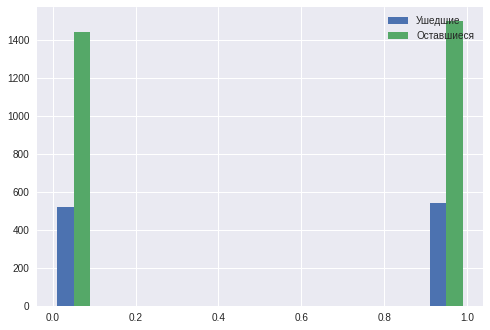

Столбец: Near_Location


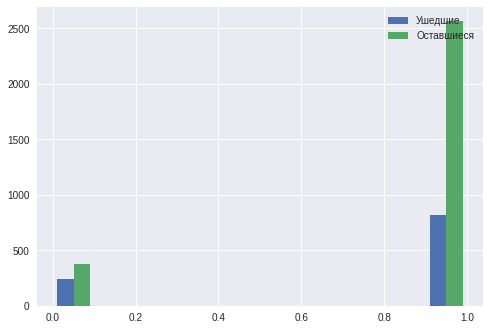

Столбец: Partner


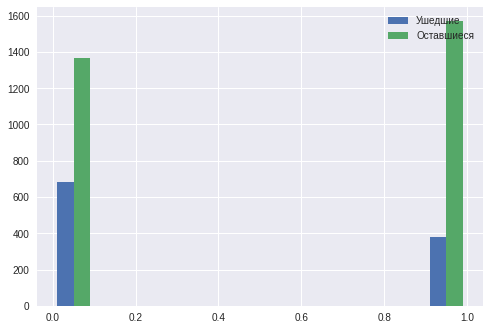

Столбец: Promo_friends


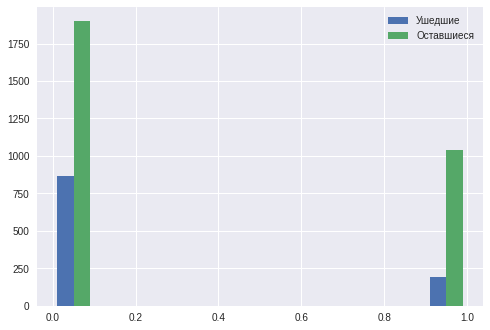

Столбец: Phone


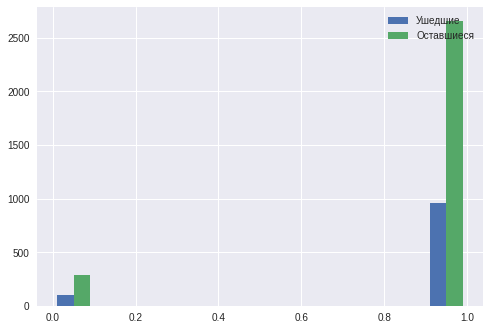

Столбец: Contract_period


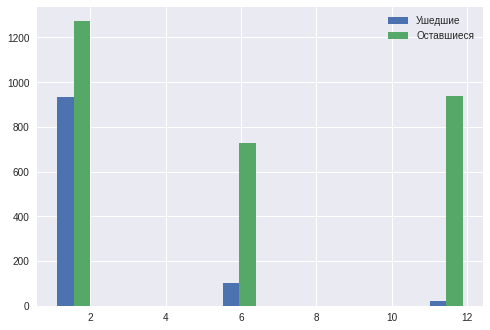

Столбец: Group_visits


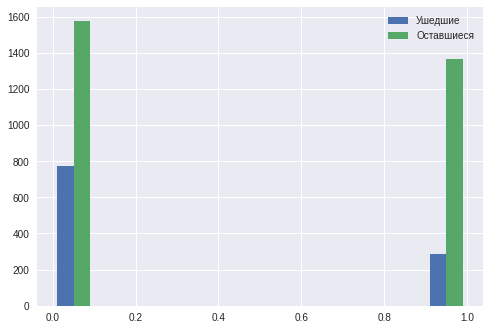

Столбец: Age


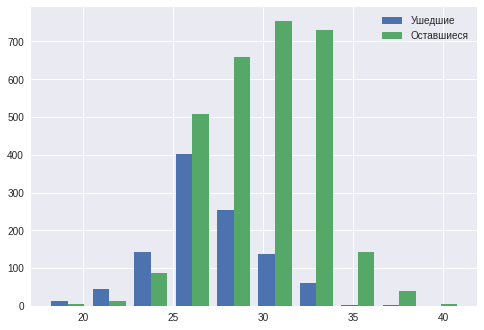

Столбец: Avg_additional_charges_total


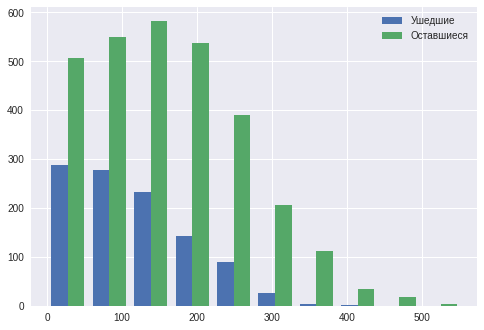

Столбец: Month_to_end_contract


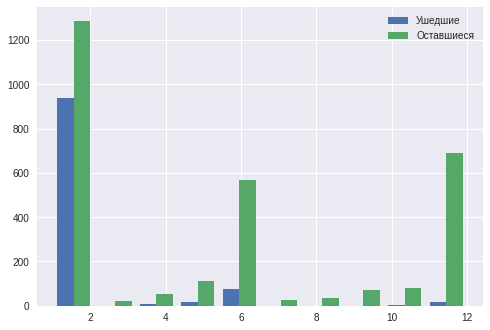

Столбец: Lifetime


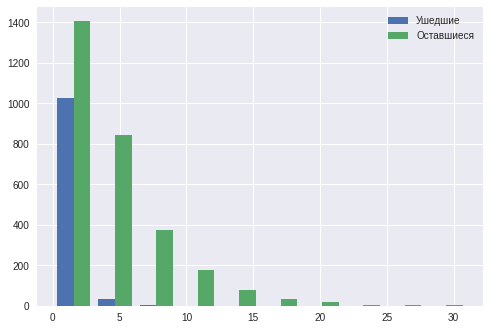

Столбец: Avg_class_frequency_total


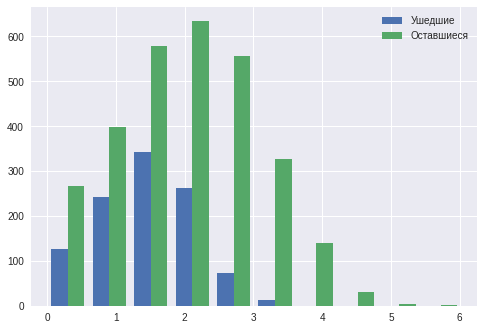

Столбец: Avg_class_frequency_current_month


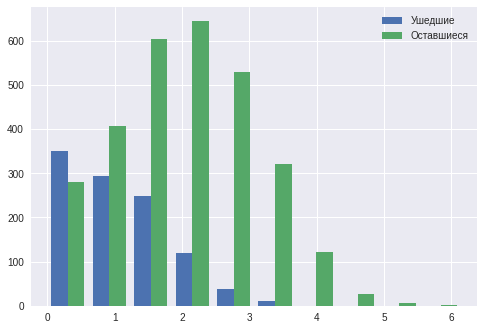

Столбец: Churn


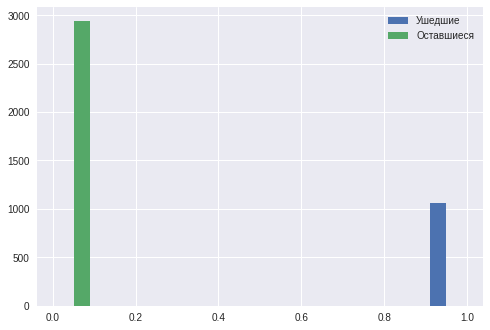

In [9]:
for col in gym.columns:
    print('Столбец:', col)
    plt.style.use('seaborn')
    plt.hist([churned[col], stayed[col]], label=['Ушедшие', 'Оставшиеся'])
    plt.legend(loc='upper right')
    plt.show()

<div class="alert alert-warning">
<b>Комментарий от ревьюера v1</b>
    
<b>Рекомендация:</b> У тебя получились хорошие графики, только лучше предерживаться стиля оформления(подписи по осям и название графика).
</div>


<AxesSubplot:>

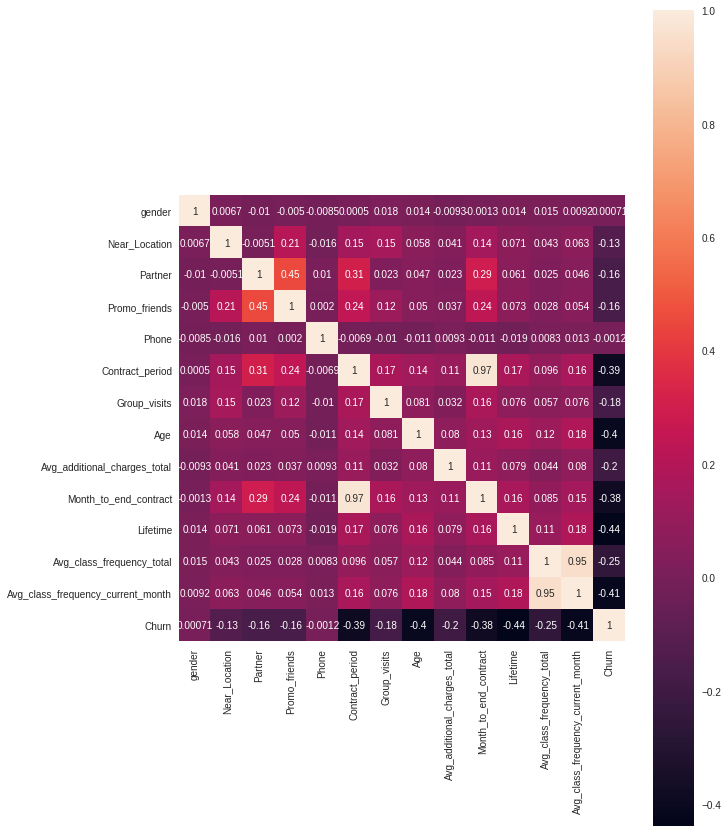

In [10]:
cm = gym.corr()
plt.figure(figsize=(10,15))
sns.heatmap(cm, annot=True, square=True)

Здесь сильно коррелируют (0.97 и 0.95) столбцы "Средняя частота посещений всего" со "Средней частотой посещений за месяц" и пара столбцов "Длительность абонемента" со "Сроком до конца абонемента". Уберём их из наших данных и заново построим график корреляции

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
<b>Успех:</b> Правильное решение, зависимость между признаками может сломать линейную модель.
</div>

In [11]:
gym = gym.drop(columns = ['Avg_class_frequency_total', 'Month_to_end_contract'])

<AxesSubplot:>

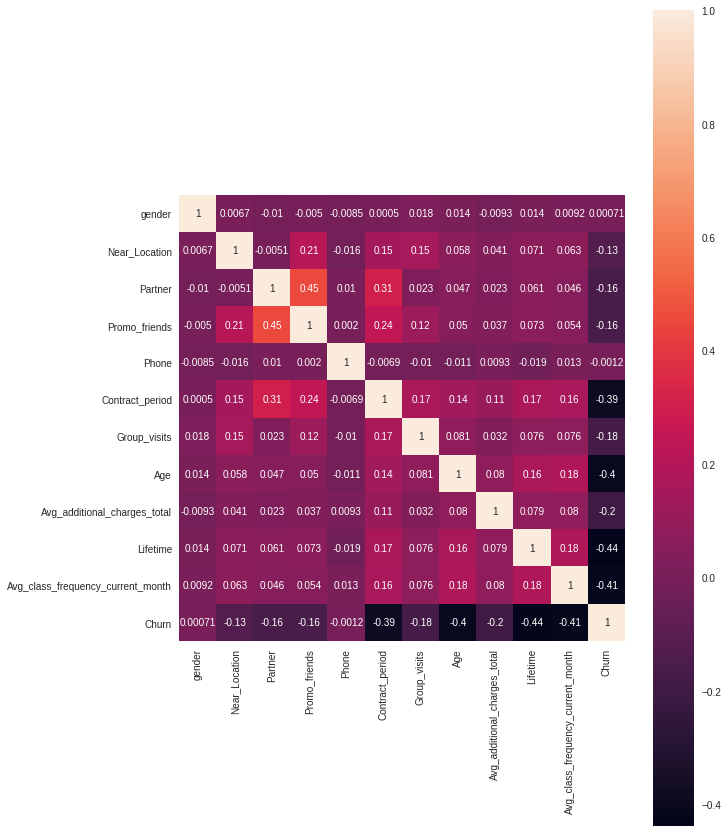

In [12]:
cm = gym.corr()
plt.figure(figsize=(10,15))
sns.heatmap(cm, annot=True, square=True)

### Вывод

1. Данные не требовали какой-то особой предобработки, в них не было пропусков и категориальных переменных. Были даны значения, с которыми сразу можно работать.
2. Из числового описания данных можно сделать некоторые выводы, например, что в основном уходили из фитнес-центра те люди, которые покупали абонемент всего на 1 месяц. А так же частота посещения людьми, которые переставали быть клиентами фитнес-центра была меньше, чем у остававшихся клиентов: 1 раз в неделю против 2-3 раз в неделю.
3. При рассмотрении распределения признаков между ушедшими и оставшимися клиентами тоже можно сделать некоторые выводы: в основном ушли те, кто не проживал или не работал рядом с фитнес-центром; среди ушедших очень мало тех, кто ушёл бы после хотя бы 5 месяцев с фитнес-центром. В основном все уходят после первого месяца.
4. В данных сильно коррелировали (0.97 и 0.95) столбцы "Средняя частота посещений всего" со "Средней частотой посещений за месяц" и пара столбцов "Длительность абонемента" со "Сроком до конца абонемента".
5. Могу сделать следующее предположение по людям, которые перестали быть клиентами фитнес-центра: это молодые (в среднем 25-27 лет) люди, которые купили абонемент "попробовать", походили на пару групповых занятий и ушли. Их не зацепило.

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
<b>Успех:</b> Хорошее исследование данных, согласен с выводами по группе оттока, но описание группы людей лучше формулировать так, чтобы оно могло помочь сформировать ответные шаги для бизнеса. Например, вместо "купили абонемент "попробовать"", лучше сказать о том, что в основном это люди с месячным абонементом.
</div>

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

### Разобьём данные на обучающую и валидационную выборки

Разделим наши данные на признаки (матрица X) и целевую переменную (y)

In [13]:
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

Разделяем данные на обучающую и валидационную выборки

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Стандартизируем данные

Создадим объект класса StandardScaler и применим его к обучающей выборке. Обучаем scaler и одновременно трансформируем матрицу для обучающей выборки. Также применяим стандартизацию к матрице признаков для тестовой выборки

In [15]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)
X_test_st = scaler.transform(X_test)

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
<b>Успех:</b> Отлично, ты правильно разбила данные и корректно использовала StandardScaler.
</div>

### Выбор моделей

Мы будем использовать две модели: логистическую регрессию и случайный лес

In [16]:
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0)
]

### Функция для подсчёта метрик accuracy, precision и recall

Напишем функцию, которая будет обучать каждую модель на тренировочной выборке, делать прогноз на тестовых данных и выводить метрики accuracy, precision и recall.

In [17]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))

### Рассчёт метрик для моделей

Запустим функцию циклом для выбранных моделей

In [18]:
for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test
    )

LogisticRegression(random_state=0)
Accuracy: 0.88
Precision: 0.74
Recall: 0.78
RandomForestClassifier(random_state=0)
Accuracy: 0.90
Precision: 0.81
Recall: 0.75


Случайный лес показал выше долю правильных ответов и точность, чем логистическая регрессия, но при этом логистическая регрессия нашла больше реальных объектов, чем случаный лес.

Примем случайный лес за приоритетную модель. Хочется понять, какие признаки она считает самыми важными, поэтому заново обучим  моделей и выведем коэффициенты важности, которые она назначают каждому признаку

In [19]:
random_forest_model = RandomForestClassifier(random_state=0)
random_forest_model.fit(X_train_st, y_train)
y_pred = random_forest_model.predict(X_test_st)

In [20]:
fi_df = pd.DataFrame(
    data={'feature': X.columns, 'importance': random_forest_model.feature_importances_}
)
print(fi_df.sort_values('importance', ascending=False))

                              feature  importance
9                            Lifetime    0.321261
10  Avg_class_frequency_current_month    0.216309
7                                 Age    0.138439
8        Avg_additional_charges_total    0.123375
5                     Contract_period    0.110949
6                        Group_visits    0.020262
0                              gender    0.016636
2                             Partner    0.016403
3                       Promo_friends    0.016031
1                       Near_Location    0.012050
4                               Phone    0.008287


Модель случайного леса наиболее важными считает лайфтайм клиента, среднее количество посещений в месяц, возраст, траты за месяц и длительность абонемента

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
<b>Успех:</b> Воу, очень круто. Не многие на ds-факультете используют feature importance, очень хорошая работа.
    
- Зафиксированы параметры случайности(random_state);
- Для теста выделено приемлемое количество данных;
- Scaler обучен на тренировочной выборке и применен к тестовой;
- Есть вывод важности признаков.
</div>

### Вывод

Случайный лес показал выше долю правильных ответов и точность, чем логистическая регрессия, но при этом логистическая регрессия нашла больше реальных объектов, чем случаный лес. Приняв случайный лес за приоритетную модель, мы посмотрели на признаки, которые она считает самыми важными. Именно от этих признаков мы и будем в дальнейшей отталкиваться при анализе признаков

## Кластеризация клиентов

Отложим в сторону столбец с оттоком и проведём кластеризацию клиентов. Для начала стандартизируем данные

### Стандартизируем данные

In [21]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

Передадим получившуюся стандартизированную таблицу в качестве параметра функции linkage(). 

In [22]:
linked = linkage(X_sc, method = 'ward') 

### Построим матрицу расстояний и нарисуем дендрограмму

В переменной linked сохранена таблица «связок» между объектами. Её можно визуализировать как дендрограмму

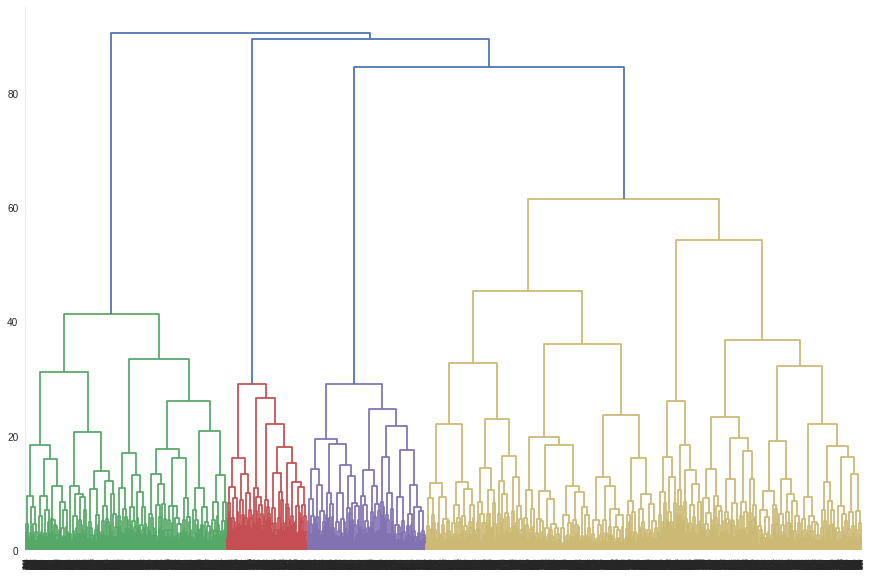

In [23]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

График предлагает сделать четыре кластера (четыре разных цвета), но мы возьмём пять, т.к. второй и третий кластеры достаточно небольшие по размеру, а четвёртый - большой. Теперь можно запустить более быстрый алгоритм K-Means

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
<b>Успех:</b> Отлично, хороший вывод, действительно, 5 - весьма условная цифра)
</div>

### Применение алгоритма K-Means

Задаём модель k_means с числом кластеров 5 и фиксируем значение random_state. Применим алгоритм к данным и сформируем вектор кластеров 

In [24]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc) 

Сохраняем метки кластера в поле нашего датасета и выводим статистику по средним значениям наших признаков по кластеру

In [25]:
gym['cluster_km'] = labels
gym.groupby('cluster_km').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,
0,0.496447,0.995939,0.892386,1.000000,1.0,6.922843,0.524873,29.606091,153.424651,4.283249,1.919520,0.119797
1,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
2,0.500940,1.000000,0.217105,0.072368,1.0,2.010338,0.277256,27.583647,119.339956,1.922932,1.203319,0.563910
3,0.534260,0.996028,0.379345,0.009930,1.0,6.208540,0.538232,30.699106,176.259567,5.415094,2.324220,0.014896
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


### Вывод
1. В первом кластере 99% клиентов живут или работают рядом с фитнес-центром, 90% из них являются партнёрами клуба, т.е. имеют льготный абонемент, и все они пришли по акции "Приведи друга". Они покупают абонемент в среднем на 6 месяцев и являются клиентами уже 4 месяца. Половина из них ходит на групповые программы, в среднем посещают фитнес-центр 2 раза в неделю. Среди них уходят 12%, т.е. почти каждый десятый.
2. Во втором кластере собраны те, кто не живут и не работают рядом с фитнес-центром. У половины льготный абонемент и почти никто не пришёл по акции "приведи друга". В основном они покупают абонементы на 1 месяц, на сопутствующие услуги тратят меньше первой группы и реже ходят в центр.
3. Из третьей группы все живут либо работают рядом, но всего 20% являются партнёрами фитнес-центра. И тоже почти никто не пришёл по акции. Тоже предпочитают абонементы на 1 месяц, они самая молодая по возрасту и по длительности пребывания в фитнес-центре в среднем группа, и тратят они меньше всех. Среди них уходит больше половины клиентов. Ходят на занятия один раз в неделю.
4. В четвёртом кластере 99% клиентов живут\работают рядом. Всего 1% клиентов пришёл по акции и треть являются партнёрами клуба. Предпочитают абонементы на полгода, половина из них посещает групповые занятия, это самая возрастная группа из выбранных. Они склонны тратить денег больше других групп, и являтся клиентами клуба они дольше всех. Ходят 2-3 раза в неделю. Это самая лояльная группа людей, среди них уходит только 1% клиентов.
5. Из пятого кластера большинство живут\работают рядом, у половины есть льготный абонемент по партнёрской программе, треть пришла по акции, но никто из них не оставил свой телефон. Чаще берут абонементы на полгода, у них средние траты на доп услуги, ходят 1-2 раза в неделю на протяжении в среднем четырёх месяцев. Но четверть из них уходит

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
<b>Успех:</b> Отлично, выделены характерные черты кластеров, теперь по таким выводам можно составить портрет клиента, который наиболее склонен к оттоку.
</div>

### Распределение признаков для кластеров

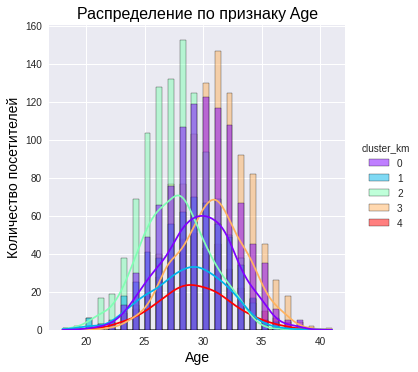

<Figure size 1296x360 with 0 Axes>

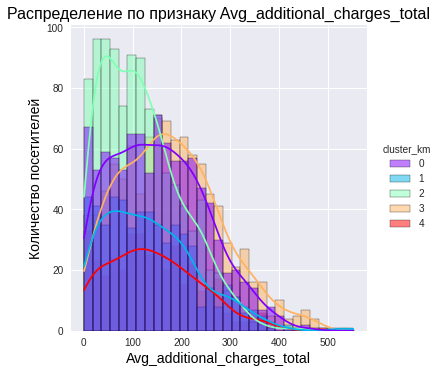

<Figure size 1296x360 with 0 Axes>

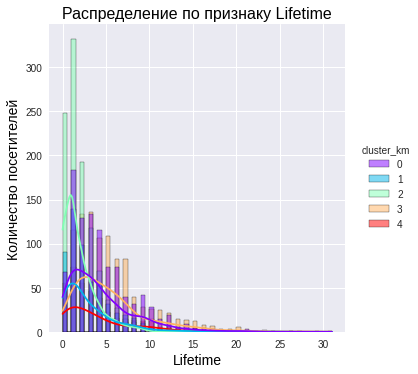

<Figure size 1296x360 with 0 Axes>

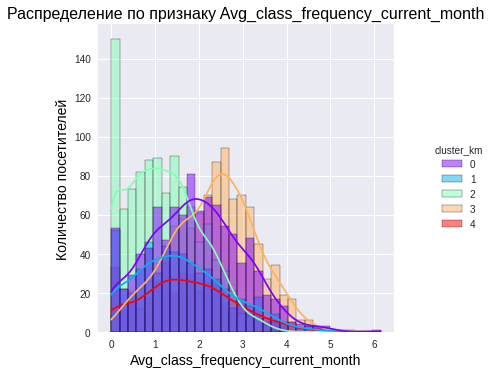

<Figure size 1296x360 with 0 Axes>

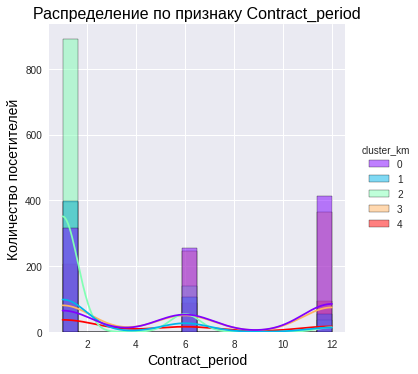

<Figure size 1296x360 with 0 Axes>

In [26]:
for name in ['Age', 'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_current_month', 'Contract_period']:    
 
    sns.displot(data = gym, x = name, kde=True, hue = 'cluster_km', palette='rainbow')
    plt.title('Распределение по признаку '  +name, fontsize = 16, color = 'black')
    plt.ylabel('Количество посетителей', fontsize = 14, color = 'black')
    plt.xlabel(name, fontsize = 14, color = 'black')
    plt.figure(figsize=(18,5))
plt.show()

### Вывод

Третий кластер самый многочисленный, и он показывает самые низкие результаты по всем параметрам. Самый малочисленный - пятый. Самые хорошие показатели у четвёртого кластера, это те, которые самые лояльные. В общем картина особо не поменялась.

### Доля оттока для каждого кластера

Сгруппируем данные и посчитаем процент клиентов, которые ушли в каждом из кластеров.

In [27]:
outflow_parts = gym.query('Churn==1').groupby('cluster_km')['Churn'].count() / gym.query('Churn==1')['Churn'].count() *100
outflow_parts  

cluster_km
0    11.121583
1    21.206409
2    56.550424
3     1.413761
4     9.707823
Name: Churn, dtype: float64

Как было видно и ранее, третий кластер самый ненадёжный, из него уходят каждый второй клиент. Четвёртый кластер самый лояльный, всего 1% уходящих клиентов.

## Общий вывод и рекомендации

### Вывод

1. Изначальные данные не требовали особой предобработки, с ними можно было сразу начинать работать.
2. При ближайшем рассмотрении были найдены признаки с сильной корреляцией, от которых мы избавились в процессе.
3. Случайный лес показал выше долю правильных ответов и точность, чем логистическая регрессия, но при этом логистическая регрессия нашла больше реальных объектов, чем случаный лес. Модель случайного леса наиболее важными считает лайфтайм клиента, среднее количество посещений в месяц, возраст, траты за месяц и длительность абонемента
4. В результате кластеризации мы выделили 5 различных кластеров клиентов. Среди этих пяти был один явно самый лояльный и один самый не-лояльный, из которого уходит половина клиентов.

### Рекомендации
1. Я предполагаю, что чем дольше клиент остаётся с фитнес-центром, тем он лояльнее. Видна явная проблема с теми, кто покупает абонемент на месяц, а потом не покупает следующий. Можно предложить клиентам, купившим абонемент на 1 месяц, скидку на покупку следующего абонемента на 6 или 12 месяцев
2. Среди самого не лояльного кластера ВСЕ живут либо работают рядом с фитнес-центром. Предполагаю, это те люди, которые присматриваются к клубу рядом с домом, и наш их чем-то не устраивает. Надо поработать над внешним видом клиентских зон, над манерами и сервисом персонала.
3. Группа людей, которая не оставила номер телефона, вероятно не хочет получать спам. При этом из них почти никто не пришёл по акции "приведи друга" и меньше половины являются партнёрами центра. У них достаточно большой лайфтайм, но четверть уходит. Можно было бы предложить им какие-то бонусы за время с клубом. И заманивать их на групповые программы, на которые ходит всего 40% группы.
4. Ни в коем случае нельзя забывать про самую лояльную группу. Они тратят на дополнительные услуги в центре больше всех денег. Им можно предложить накопительные карточки или сделай 3-5 процедур, получи следующую в подарок. Для них это может быть актуально, с учётом того, что они и так ходят и тратят на эти услуги деньги.

<div class="alert alert-block alert-success">
    <b>Комментарий от ревьюера v1</b>
    
# Общий вывод
    
Отличная работа, с технической стороной вопроса ты справилась на 100%. Ты хорошо понимаешь данные и видишь закономерности, молодец. С обучением моделей все в порядке, можно расширить его с помощью поиска оптимальных гиперпараметров, но это на твое усмотрение) Согласен с выводами, ты оставила достаточно четкие инструкции для бизнеса.
</div>

Я готов принять твою работу, возвращаю тебе только для того, чтобы у тебя была возможность задать вопросы. Если их не будет, то присылай назад и я приму проект.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Большое спасибо!
</div>

<div class="alert alert-block alert-success">
    <b>Комментарий от ревьюера v2</b>
    
Спасибо за проект, успехов в учебе)
</div>
